

```
# This is formatted as code
```





# The goal of this project is to predict the  sales prices of the fruit  by using Linear Regression.
# Data provide by the instructor:Infofitsoftware (anish Singh).
# Student:Boniface Talla Sohoue


In [ ]:
LINEAR-REGRESSION

In [ ]:
# we Import our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import & read dataset
data=pd.read_excel('/content/Fruit vs Prices 2020.xlsx')


In [ ]:
data

,Fruit,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
0,Apples,Fresh,1.5193,per pound,0.90,0.2425,pounds,0.4094
1,"Apples, applesauce",Canned,1.0660,per pound,1.00,0.5401,pounds,0.5758
2,"Apples, ready-to-drink",Juice,0.7804,per pint,1.00,8.0000,fluid ounces,0.3902
3,"Apples, frozen concentrate",Juice,0.5853,per pint,1.00,8.0000,fluid ounces,0.2926
4,Apricots,Fresh,2.9665,per pound,0.93,0.3638,pounds,1.1603
...,...,...,...,...,...,...,...,...
57,Raspberries,Fresh,6.6391,per pound,0.96,0.3197,pounds,2.2107
58,Raspberries,Frozen,4.1877,per pound,1.00,0.3307,pounds,1.3849
59,Strawberries,Fresh,2.5800,per pound,0.94,0.3197,pounds,0.8774
60,Strawberries,Frozen,2.8189,per pound,1.00,0.3307,pounds,0.9322


In [ ]:
data.Form.value_counts()

2    24
0    12
4    11
1     9
3     6
Name: Form, dtype: int64

In [ ]:
data.Fruit.value_counts()

33    2
9     2
28    2
34    2
10    2
40    2
4     2
50    2
51    2
32    1
31    1
38    1
30    1
35    1
36    1
37    1
0     1
43    1
39    1
42    1
44    1
41    1
45    1
47    1
46    1
48    1
49    1
29    1
26    1
27    1
1     1
3     1
2     1
5     1
6     1
7     1
8     1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
25    1
24    1
52    1
Name: Fruit, dtype: int64

Features Engineering

In [ ]:


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Form"] = le.fit_transform(data["Form"])

In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Fruit"] = le.fit_transform(data["Fruit"])
data["CupEquivalentUnit"] = le.fit_transform(data["CupEquivalentUnit"])
data["RetailPriceUnit"] = le.fit_transform(data["RetailPriceUnit"])

In [ ]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')


In [ ]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(), [0])])

In [ ]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[6])],remainder='passthrough')
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')

In [ ]:
# Data after Engineering
data


,Fruit,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice,Fuit
0,0,2,1.5193,1,0.90,0.2425,1,0.4094,0
1,1,0,1.0660,1,1.00,0.5401,1,0.5758,1
2,3,4,0.7804,0,1.00,8.0000,0,0.3902,3
3,2,4,0.5853,0,1.00,8.0000,0,0.2926,2
4,4,2,2.9665,1,0.93,0.3638,1,1.1603,4
...,...,...,...,...,...,...,...,...,...
57,50,2,6.6391,1,0.96,0.3197,1,2.2107,50
58,50,3,4.1877,1,1.00,0.3307,1,1.3849,50
59,51,2,2.5800,1,0.94,0.3197,1,0.8774,51
60,51,3,2.8189,1,1.00,0.3307,1,0.9322,51


In [ ]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(), [1])])

In [ ]:
# Dependent/Independent Features(X/y)

X=data.drop('RetailPrice',axis = 1).values

y=data.iloc[:,2].values

In [ ]:
X


array([[ 0.    ,  2.    ,  1.    ,  0.9   ,  0.2425,  1.    ,  0.4094,
         0.    ],
       [ 1.    ,  0.    ,  1.    ,  1.    ,  0.5401,  1.    ,  0.5758,
         1.    ],
       [ 3.    ,  4.    ,  0.    ,  1.    ,  8.    ,  0.    ,  0.3902,
         3.    ],
       [ 2.    ,  4.    ,  0.    ,  1.    ,  8.    ,  0.    ,  0.2926,
         2.    ],
       [ 4.    ,  2.    ,  1.    ,  0.93  ,  0.3638,  1.    ,  1.1603,
         4.    ],
       [ 5.    ,  0.    ,  1.    ,  1.    ,  0.5401,  1.    ,  0.9131,
         5.    ],
       [ 6.    ,  0.    ,  1.    ,  0.65  ,  0.4409,  1.    ,  1.3974,
         6.    ],
       [ 4.    ,  1.    ,  1.    ,  1.    ,  0.1433,  1.    ,  0.9485,
         4.    ],
       [ 7.    ,  2.    ,  1.    ,  0.64  ,  0.3307,  1.    ,  0.2712,
         7.    ],
       [ 8.    ,  3.    ,  1.    ,  1.    ,  0.3307,  1.    ,  1.1768,
         8.    ],
       [ 9.    ,  2.    ,  1.    ,  0.96  ,  0.3197,  1.    ,  2.0037,
         9.    ],
       [ 9.    ,  3. 

In [ ]:
y

array([2, 0, 4, 4, 2, 0, 0, 1, 2, 3, 2, 3, 2, 3, 2, 2, 0, 2, 1, 1, 1, 0,
       0, 2, 4, 2, 1, 4, 4, 2, 2, 2, 1, 2, 2, 4, 4, 2, 1, 2, 0, 0, 3, 2,
       0, 0, 2, 0, 0, 1, 4, 4, 2, 1, 4, 2, 4, 2, 3, 2, 3, 2])

In [ ]:
data.nunique()

Fruit                 53
Form                   5
RetailPrice           62
RetailPriceUnit        2
Yield                 20
CupEquivalentSize     19
CupEquivalentUnit      2
CupEquivalentPrice    62
dtype: int64

In [ ]:
# Remove irrelevant columns
data_new=data.drop(['Fruit','Form','RetailPriceUnit','CupEquivalentUnit'],axis=1,in place=True)

In [ ]:
data_new

,RetailPrice,Yield,CupEquivalentSize,CupEquivalentPrice
0,1.5193,0.90,0.2425,0.4094
1,1.0660,1.00,0.5401,0.5758
2,0.7804,1.00,8.0000,0.3902
3,0.5853,1.00,8.0000,0.2926
4,2.9665,0.93,0.3638,1.1603
...,...,...,...,...
57,6.6391,0.96,0.3197,2.2107
58,4.1877,1.00,0.3307,1.3849
59,2.5800,0.94,0.3197,0.8774
60,2.8189,1.00,0.3307,0.9322


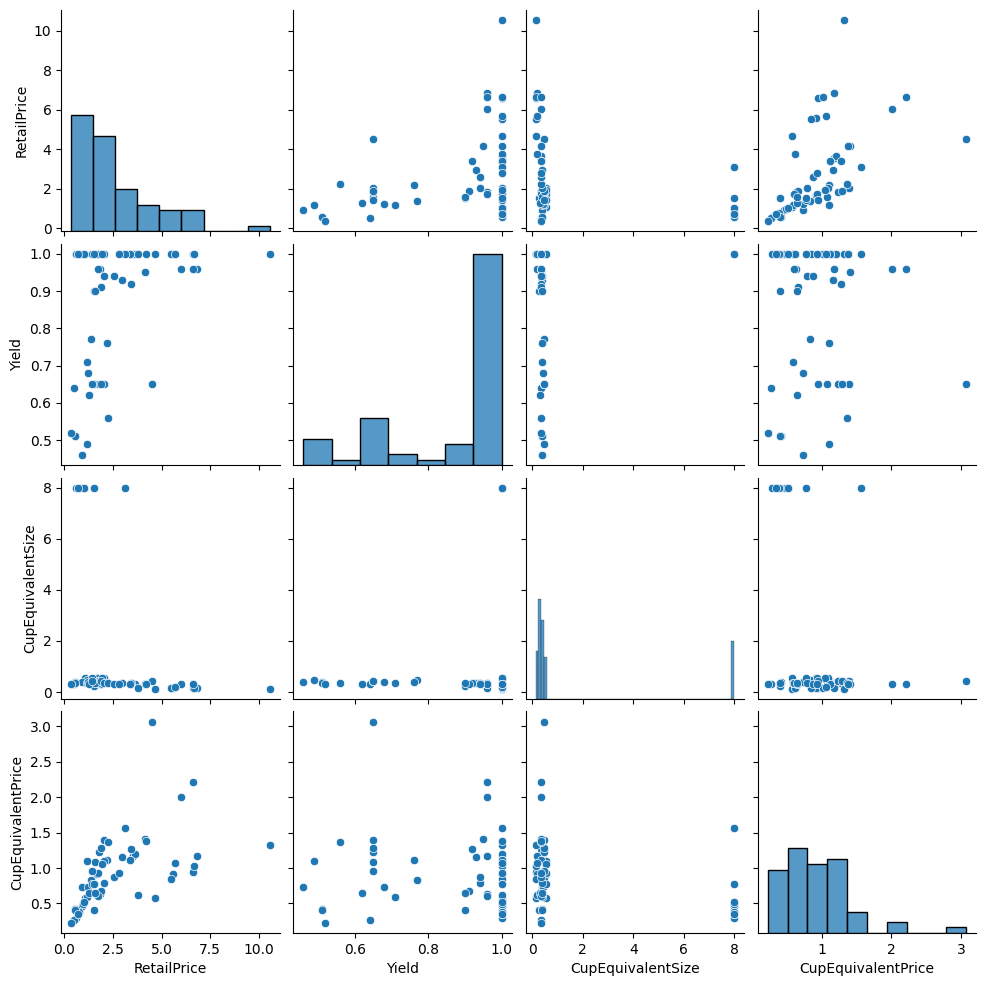

In [ ]:
sns.pairplot(data_new)

In [ ]:
#Correlation Matrix
data_new.corr()

,RetailPrice,Yield,CupEquivalentSize,CupEquivalentPrice
RetailPrice,1.000000,0.363305,-0.363598,0.571693
Yield,0.363305,1.000000,0.321769,-0.030154
CupEquivalentSize,-0.363598,0.321769,1.000000,-0.345158
CupEquivalentPrice,0.571693,-0.030154,-0.345158,1.000000


#Data_new Exploration and visualisation


In [ ]:
#Information of data_new
data_new.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RetailPrice         62 non-null     float64
 1   Yield               62 non-null     float64
 2   CupEquivalentSize   62 non-null     float64
 3   CupEquivalentPrice  62 non-null     float64
dtypes: float64(4)
memory usage: 2.1 KB


In [ ]:
data_new.describe()

,RetailPrice,Yield,CupEquivalentSize,CupEquivalentPrice
count,62.000000,62.000000,62.000000,62.000000
mean,2.616050,0.876129,1.704984,0.919740
std,2.068129,0.174979,2.949262,0.491960
min,0.360400,0.460000,0.123200,0.229200
25%,1.155850,0.722500,0.322450,0.579300
50%,1.868400,0.980000,0.363800,0.895250
75%,3.525600,1.000000,0.540100,1.150475
max,10.552700,1.000000,8.000000,3.070000


In [ ]:
data_new.isnull().sum()

RetailPrice           0
Yield                 0
CupEquivalentSize     0
CupEquivalentPrice    0
dtype: int64

In [ ]:
# Dependent & Independent Features(X/y)
X=data_new.iloc[:,1:].values
y=data_new.iloc[:,0].values


In [ ]:
X

array([[0.9   , 0.2425, 0.4094],
       [1.    , 0.5401, 0.5758],
       [1.    , 8.    , 0.3902],
       [1.    , 8.    , 0.2926],
       [0.93  , 0.3638, 1.1603],
       [1.    , 0.5401, 0.9131],
       [0.65  , 0.4409, 1.3974],
       [1.    , 0.1433, 0.9485],
       [0.64  , 0.3307, 0.2712],
       [1.    , 0.3307, 1.1768],
       [0.96  , 0.3197, 2.0037],
       [1.    , 0.3307, 1.2025],
       [0.95  , 0.3197, 1.4045],
       [1.    , 0.3307, 1.121 ],
       [0.51  , 0.3748, 0.4238],
       [0.92  , 0.3417, 1.2729],
       [0.65  , 0.4409, 3.07  ],
       [0.77  , 0.463 , 0.8326],
       [1.    , 0.1232, 0.5729],
       [1.    , 0.1653, 0.9212],
       [0.96  , 0.1653, 1.1776],
       [1.    , 0.5401, 0.9289],
       [0.65  , 0.4409, 1.0808],
       [0.49  , 0.463 , 1.105 ],
       [1.    , 8.    , 0.5208],
       [0.96  , 0.3307, 0.6338],
       [1.    , 0.1653, 0.625 ],
       [1.    , 8.    , 0.4607],
       [1.    , 8.    , 0.3559],
       [0.46  , 0.3748, 0.7378],
       [0.

In [ ]:
X.shape

(62, 3)

In [ ]:
y

array([ 1.5193,  1.066 ,  0.7804,  0.5853,  2.9665,  1.6905,  2.06  ,
        6.6188,  0.5249,  3.5585,  6.0172,  3.6362,  4.1739,  3.3898,
        0.5767,  3.4269,  4.5257,  1.3847,  4.6513,  5.5713,  6.8371,
        1.7198,  1.5932,  1.1695,  1.0415,  1.8398,  3.7801,  0.9215,
        0.7119,  0.9056,  2.1849,  1.1513, 10.5527,  1.9062,  1.2131,
        0.9842,  0.769 ,  1.2904,  5.5089,  1.7167,  2.0237,  1.8117,
        3.3867,  1.5865,  1.9546,  1.897 ,  0.5685,  1.4344,  1.4067,
        6.6492,  1.0288,  0.6973,  2.0292,  5.7042,  1.5522,  2.235 ,
        3.122 ,  6.6391,  4.1877,  2.58  ,  2.8189,  0.3604])

In [ ]:
y.shape

(62,)

In [ ]:
# data_new spliting in Training & Testing (80% Training & 20$  Testing)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
X_train

array([[1.    , 0.3307, 1.121 ],
       [0.91  , 0.3197, 0.6696],
       [0.68  , 0.4079, 0.7276],
       [1.    , 8.    , 0.2926],
       [0.77  , 0.463 , 0.8326],
       [1.    , 8.    , 0.7761],
       [0.64  , 0.3307, 0.2712],
       [0.65  , 0.4409, 1.3974],
       [0.71  , 0.3638, 0.5898],
       [0.93  , 0.3638, 1.1603],
       [0.65  , 0.4409, 1.2868],
       [1.    , 0.1653, 0.9212],
       [0.94  , 0.3638, 0.7852],
       [1.    , 8.    , 0.3845],
       [1.    , 0.1874, 1.0689],
       [0.65  , 0.4409, 1.229 ],
       [1.    , 0.3307, 1.3849],
       [0.92  , 0.3417, 1.2729],
       [1.    , 0.5401, 1.0931],
       [1.    , 8.    , 0.4607],
       [1.    , 0.1653, 0.625 ],
       [1.    , 8.    , 0.5208],
       [1.    , 0.5401, 1.0557],
       [1.    , 0.3307, 1.2025],
       [1.    , 0.1253, 1.3219],
       [0.56  , 0.3417, 1.3638],
       [0.9   , 0.3638, 0.6412],
       [0.62  , 0.3086, 0.6424],
       [0.46  , 0.3748, 0.7378],
       [0.51  , 0.3638, 0.4055],
       [1.

In [ ]:
#Model Development
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
model

LinearRegression()

In [ ]:
#Model Training
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Model Prediction
y_predict=model.predict(X_test)

In [ ]:
y_predict

array([0.94920442, 3.13695971, 2.2843126 , 6.39601978, 3.86729172,
       1.83480773, 6.25735107, 4.64945983, 3.09668048, 3.48631523,
       2.84835095, 4.47703251, 3.57819698])

Text(0, 0.5, 'RetailPrice')

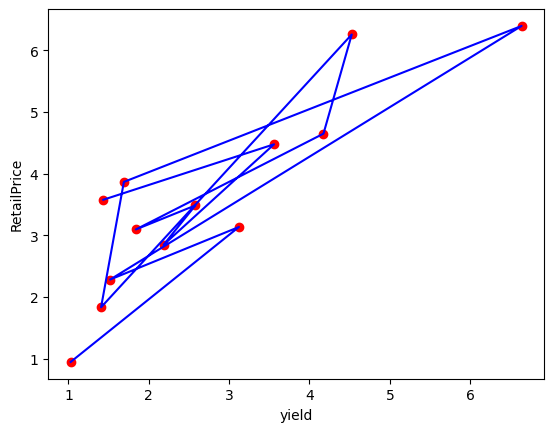

In [ ]:
#Model visualisation
plt.scatter(y_test,y_predict, color='red')
plt.plot(y_test,y_predict, color='blue')
plt.xlabel('yield')
plt.ylabel('RetailPrice')

Metrics Evaluation


In [ ]:
#model Accuracy
model.score(X,y)

0.5642052735698457

In [ ]:

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
mae=mean_absolute_error(y_test,y_predict)

In [ ]:
mae

1.3137117704162067

In [ ]:
mse=mean_squared_error(y_test,y_predict)

In [ ]:
mse

1.3137117704162067

In [ ]:
r2=r2_score(y_test,y_predict)

In [ ]:
r2

0.45626665774423625

In [ ]:
# OLS,LinearRegression
import statsmodels.api as sm

In [ ]:
model=sm.OLS(y_train,X_train).fit()

In [ ]:
model

In [ ]:
prediction=model.predict(X_test)

In [ ]:
prediction

array([0.84412134, 2.19117193, 2.67325371, 5.11735575, 3.48291206,
       2.70265175, 5.42571206, 4.05510169, 3.08463601, 3.35206969,
       3.188365  , 3.88197994, 3.30490986])

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.774
Model:                            OLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                              52.54
Date:                Fri, 09 Feb 2024   Prob (F-statistic):                    6.73e-15
Time:                        08:38:43   Log-Likelihood:                         -92.580
No. Observations:                  49   AIC:                                      191.2
Df Residuals:                      46   BIC:                                      196.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.4616      0.854      2.883      0.006       0.743       4.181
x2            -0.2849      0.101     -2.825      0.007      -0.488      -0.082
x3             1.2871      0.712      1.808      0.077      -0.146       2.720
==============================================================================
Omnibus:                       30.721   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.861
Skew:                           1.854   Prob(JB):                     1.36e-14
Kurtosis:                       7.187   Cond. No.                         16.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion :**
Our model is not accurate base of r square, mase & mae values are near zero. we can try to fit our dataset into polynomial regression model.

Thank
